In [3]:
import pandas as pd

df = pd.read_csv("nutrition-facts.csv") 

df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
#DATA EXPLORATION-(A)
import pandas as pd

df = pd.read_csv("nutrition-facts.csv")

data_types = df.dtypes
print(data_types)

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


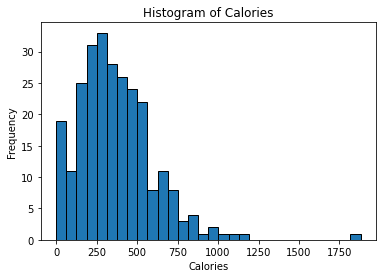

In [5]:
#PLOTTING THE HISTOGRAM OF CALORIES-(B)

import matplotlib.pyplot as plt

plt.hist(df['Calories'], bins=30, edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Histogram of Calories')
plt.show()


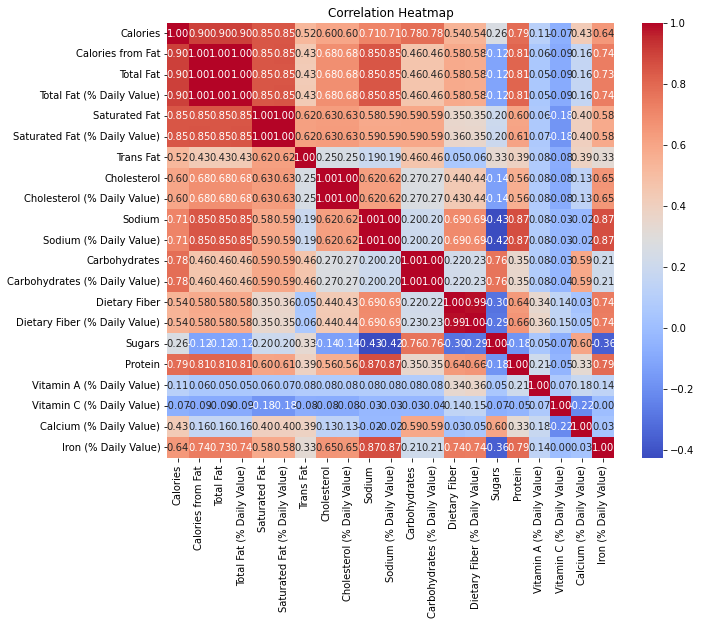

In [6]:
#CORRELATION HEATMAP BETWEEN FEATURES AND CALORIES-(C)
import seaborn as sns
import numpy as np

corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
#LIST OF FEATURES WITH THE SECOND AND THIRD LARGEST POSITIVE CORRELATION WITH CALORIES-(D)
correlations = df.corr()['Calories'].drop('Calories').sort_values(ascending=False)
second_largest = correlations.index[0]
third_largest = correlations.index[1]
print(f"Second largest correlation: {second_largest}")
print(f"Third largest correlation: {third_largest}")

Second largest correlation: Calories from Fat
Third largest correlation: Total Fat


In [8]:
#LIST OF ALL FEATURES WITH NEGATIVE CORRELATION WITH CALORIES-(E)
negative_correlations = correlations[correlations < 0]
print(negative_correlations)

Vitamin C (% Daily Value)   -0.068747
Name: Calories, dtype: float64


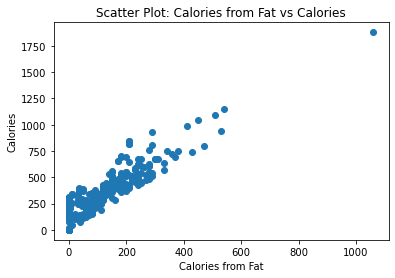

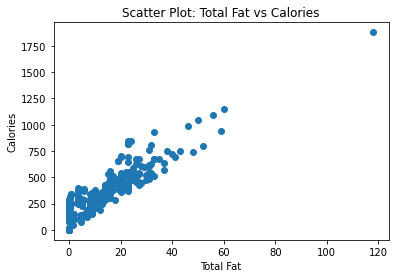

In [9]:
#PLOTTING
#PLOTTING OF FEATURES FOR 1(D) WITH CALORIES-(A)
for feature in [second_largest, third_largest]:
    plt.scatter(df[feature], df['Calories'])
    plt.xlabel(feature)
    plt.ylabel('Calories')
    plt.title(f'Scatter Plot: {feature} vs Calories')
    plt.show()

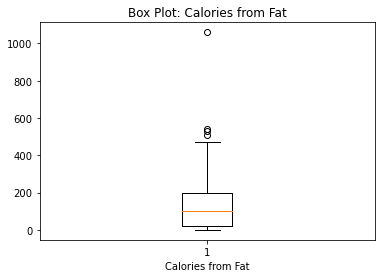

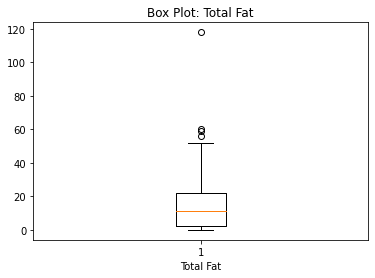

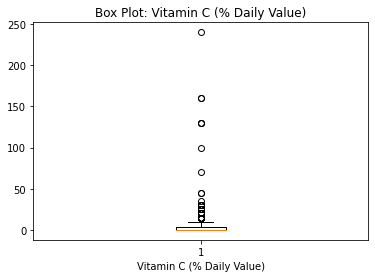

In [10]:
#BOX PLOTTING FOR FEATURES IN 1(D)AND 1(E)-(B)
for feature in [second_largest, third_largest] + list(negative_correlations.index):
    plt.boxplot(df[feature].dropna())
    plt.xlabel(feature)
    plt.title(f'Box Plot: {feature}')
    plt.show()

In [11]:
#DATA PRE-PROCESSING
#MEDIAN AND STANDARD DEVIATION FOR ALL NUMERICAL FEATURES-(A)
stats = df.describe().loc[['50%', 'std']]
print(stats)

       Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
50%  340.000000         100.000000  11.000000                  17.000000   
std  240.269886         127.875914  14.205998                  21.885199   

     Saturated Fat  Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  \
50%       5.000000                      24.000000   0.000000    35.000000   
std       5.321873                      26.639209   0.429133    87.269257   

     Cholesterol (% Daily Value)      Sodium  ...  Carbohydrates  \
50%                    11.000000  190.000000  ...      44.000000   
std                    29.091653  577.026323  ...      28.252232   

     Carbohydrates (% Daily Value)  Dietary Fiber  \
50%                      15.000000       1.000000   
std                       9.419544       1.567717   

     Dietary Fiber (% Daily Value)     Sugars    Protein  \
50%                       5.000000  17.500000  12.000000   
std                       6.307057  28.679797  11.4261

In [12]:
#REPLACING MISSING MEAN VALUES-(B)
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)
new_stats = df.describe().loc[['50%', 'std']]
print(new_stats)

       Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
50%  340.000000         100.000000  11.000000                  17.000000   
std  240.269886         127.875914  14.205998                  21.885199   

     Saturated Fat  Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  \
50%       5.000000                      24.000000   0.000000    35.000000   
std       5.321873                      26.639209   0.429133    87.269257   

     Cholesterol (% Daily Value)      Sodium  ...  Carbohydrates  \
50%                    11.000000  190.000000  ...      44.000000   
std                    29.091653  577.026323  ...      28.252232   

     Carbohydrates (% Daily Value)  Dietary Fiber  \
50%                      15.000000       1.000000   
std                       9.419544       1.567717   

     Dietary Fiber (% Daily Value)     Sugars    Protein  \
50%                       5.000000  17.500000  12.000000   
std                       6.307057  28.679797  11.4261

In [13]:
#LINEAR REGRESSION
#LINEAR REGRESSION MODEL TO PREDICT CALORIES-(A)
from sklearn.linear_model import LinearRegression

X = df[['Carbohydrates', 'Protein', 'Total Fat']]
y = df['Calories']
model = LinearRegression()
model.fit(X, y)

print(f"θ0: {model.intercept_}")
print(f"θ1: {model.coef_[0]}")
print(f"θ2: {model.coef_[1]}")
print(f"θ3: {model.coef_[2]}")

θ0: -1.8292919301438815
θ1: 3.978969033038244
θ2: 4.045248580190013
θ3: 9.018622055128334


In [14]:
#TRAIN TEST SPLIT AND CALCULATING MSE-(B)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 29.824327144971313
Test MSE: 34.54369862395005


In [15]:
#LOGISTIC REGRESSION
#TRAIN LOGISTIC REGRESSION MODEL WITH DIFFERENT C VALUES-(A)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_diabetes

# Load dataset
diabetes = load_diabetes()
X, y = diabetes.data, (diabetes.target > diabetes.target.mean()).astype(int)

C_values = [0.01, 0.1, 1, 10, 100]
for c in C_values:
    model_l1 = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    model_l2 = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    model_l1.fit(X, y)
    model_l2.fit(X, y)
    print(f"C={c} | L1 Score: {model_l1.score(X, y)} | L2 Score: {model_l2.score(X, y)}")

C=0.01 | L1 Score: 0.5588235294117647 | L2 Score: 0.5588235294117647
C=0.1 | L1 Score: 0.5588235294117647 | L2 Score: 0.5610859728506787
C=1 | L1 Score: 0.7669683257918553 | L2 Score: 0.751131221719457
C=10 | L1 Score: 0.751131221719457 | L2 Score: 0.748868778280543
C=100 | L1 Score: 0.753393665158371 | L2 Score: 0.7420814479638009
